In [1]:
# EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = "C:\\Users\\msi00\\OneDrive\\Desktop\\SBI.csv"
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
         Date       Open       High        Low      Close  Adj Close  \
0  05-01-2004  53.898628  57.016964  53.568394  56.700886  42.897266   
1  06-01-2004  56.799953  58.436962  55.865868  56.719753  42.911533   
2  07-01-2004  57.809521  57.809521  55.125206  56.290455  42.586750   
3  08-01-2004  56.799953  59.347462  56.799953  58.569057  44.310638   
4  09-01-2004  59.253109  61.423206  58.970051  60.390053  45.688313   

       Volume  
0  68132760.0  
1  84466581.0  
2  71533904.0  
3  44911270.0  
4  73303987.0  


In [5]:
# Get a summary of the dataset
print("\nDataset information:")
data.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5100 non-null   object 
 1   Open       5091 non-null   float64
 2   High       5091 non-null   float64
 3   Low        5091 non-null   float64
 4   Close      5091 non-null   float64
 5   Adj Close  5091 non-null   float64
 6   Volume     5091 non-null   float64
dtypes: float64(6), object(1)
memory usage: 279.0+ KB


In [6]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [7]:
# Get a summary of the statistical data
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
              Open         High          Low        Close    Adj Close  \
count  5091.000000  5091.000000  5091.000000  5091.000000  5091.000000   
mean    259.404107   262.781202   255.606058   259.080835   238.031544   
std     160.901153   162.289706   159.286365   160.802900   161.905802   
min      38.401299    40.076046    36.797314    38.561695    29.173988   
25%     163.794998   166.467506   160.219918   163.457504   140.678871   
50%     230.899994   233.699997   227.610001   230.365005   202.508728   
75%     298.774994   303.149994   294.475006   298.402496   275.491349   
max     897.000000   912.000000   883.299988   905.650024   905.650024   

             Volume  
count  5.091000e+03  
mean   2.436879e+07  
std    1.799988e+07  
min    0.000000e+00  
25%    1.353107e+07  
50%    1.920273e+07  
75%    2.875753e+07  
max    2.626771e+08  


In [8]:
# Check for missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64


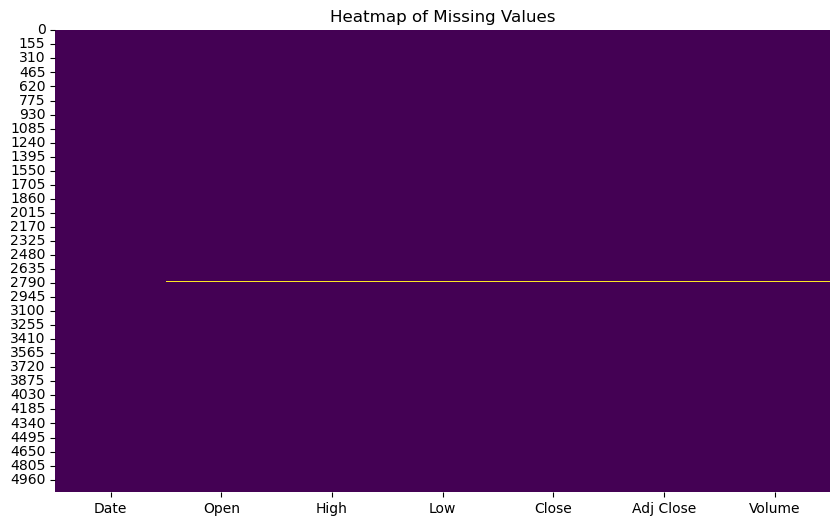

In [9]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

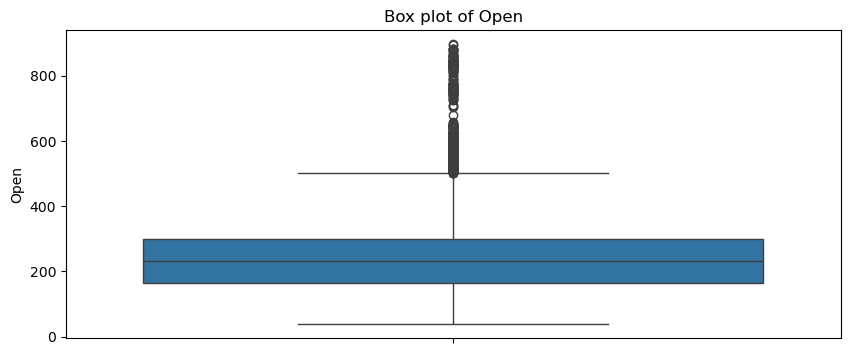

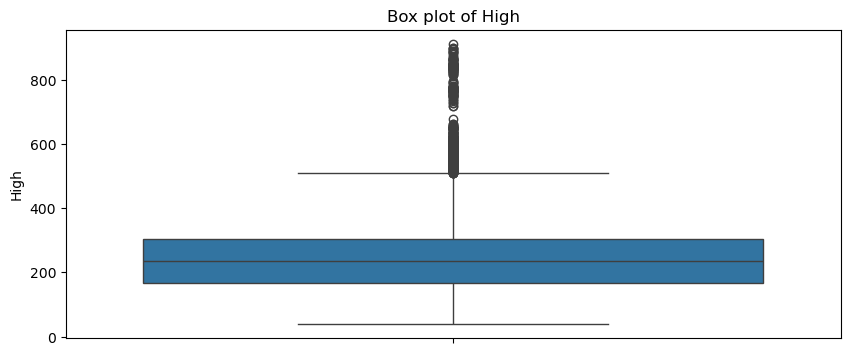

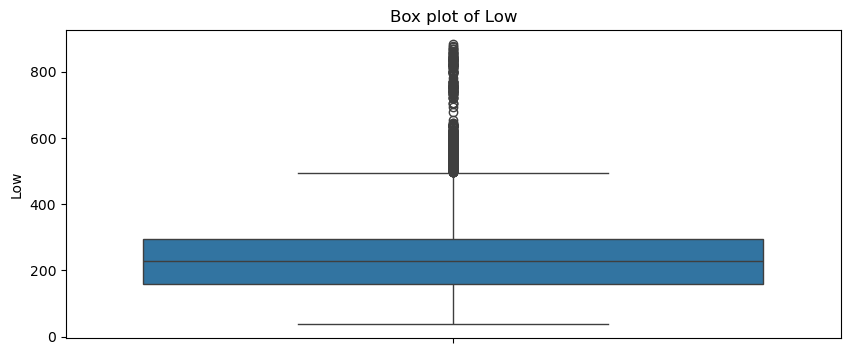

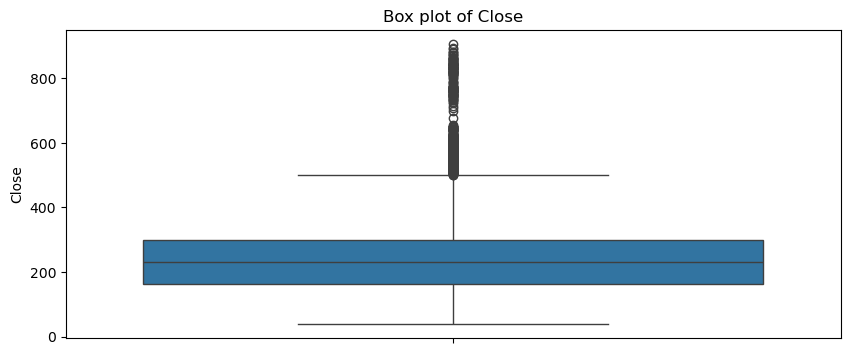

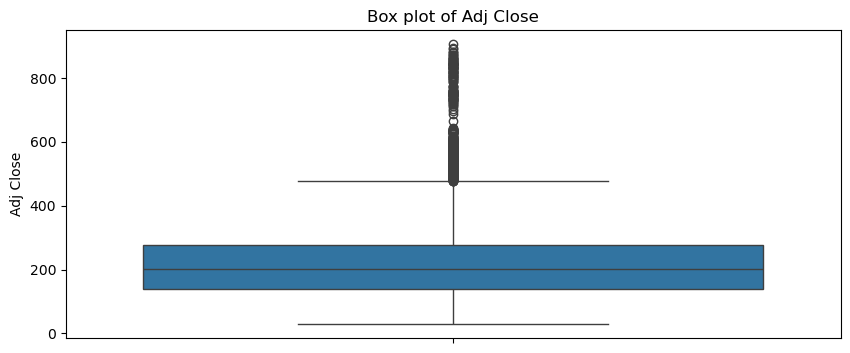

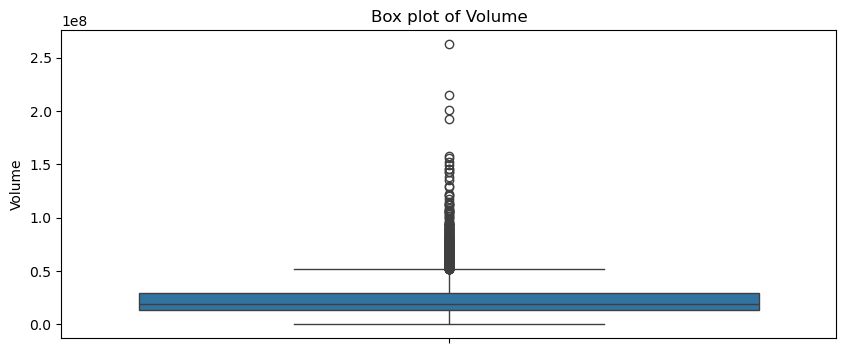

In [10]:
# Box plots to detect outliers in numerical variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[col])
    plt.title(f"Box plot of {col}")
    plt.show()

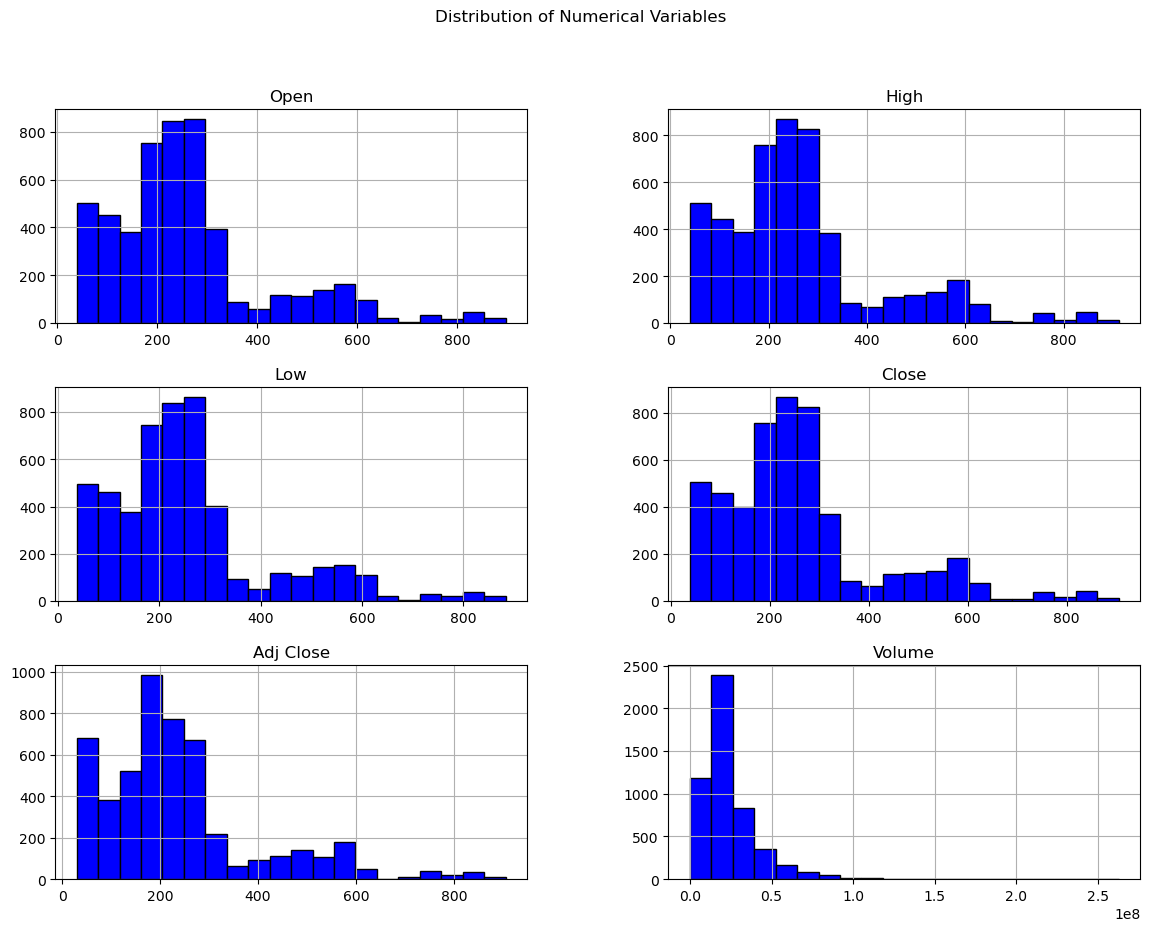

In [12]:
# Plot histograms for numerical variables
data.hist(figsize=(14, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables")
plt.show()

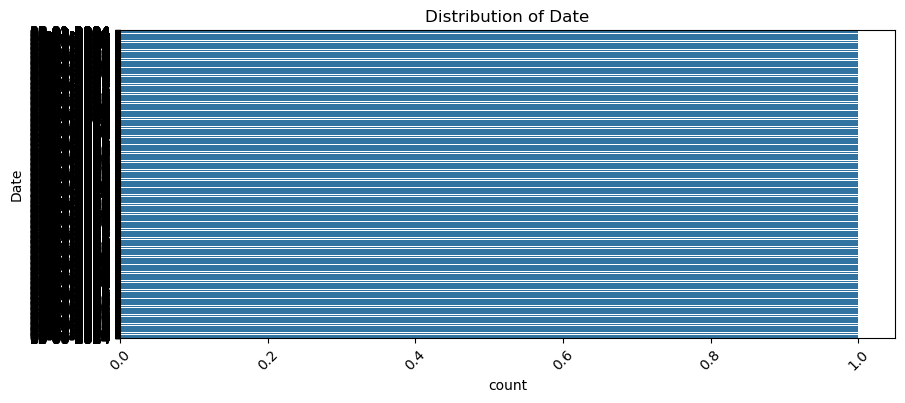

In [13]:
# Bar plots for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [14]:
# Convert the 'Date' column to datetime format with dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Set the date as the index
data.set_index('Date', inplace=True)

# Display the first few rows to confirm the conversion
print("First few rows with Date as index:")
print(data.head())

First few rows with Date as index:
                 Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2004-01-05  53.898628  57.016964  53.568394  56.700886  42.897266  68132760.0
2004-01-06  56.799953  58.436962  55.865868  56.719753  42.911533  84466581.0
2004-01-07  57.809521  57.809521  55.125206  56.290455  42.586750  71533904.0
2004-01-08  56.799953  59.347462  56.799953  58.569057  44.310638  44911270.0
2004-01-09  59.253109  61.423206  58.970051  60.390053  45.688313  73303987.0


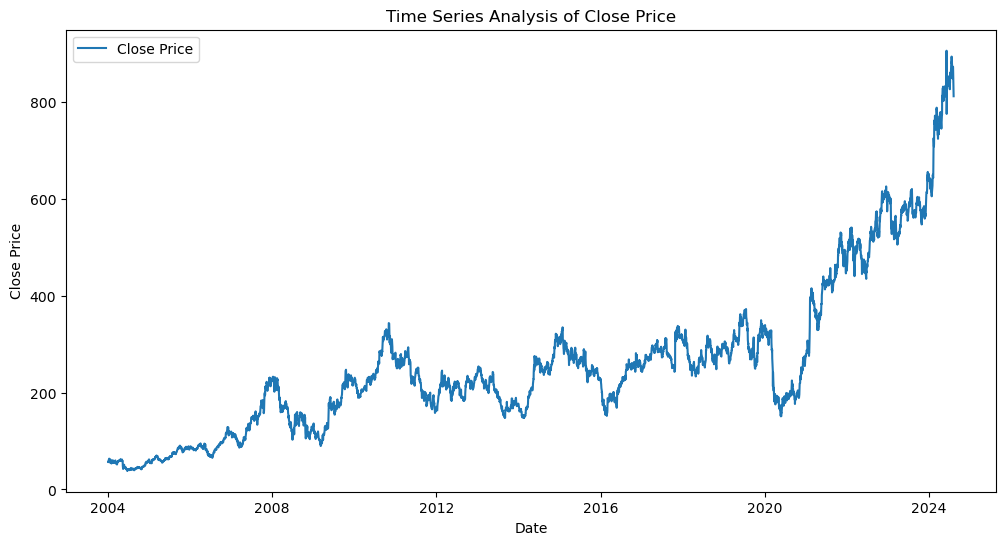

In [15]:
# Plot the time series data (for a specific column, e.g., 'Close')
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title("Time Series Analysis of Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

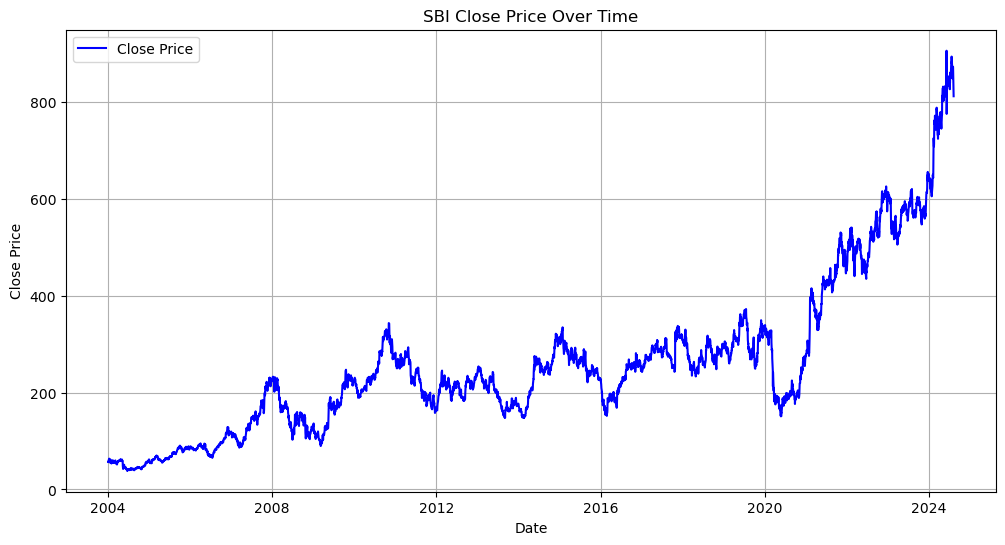

In [16]:
import matplotlib.pyplot as plt

# Line plot for 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title("SBI Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

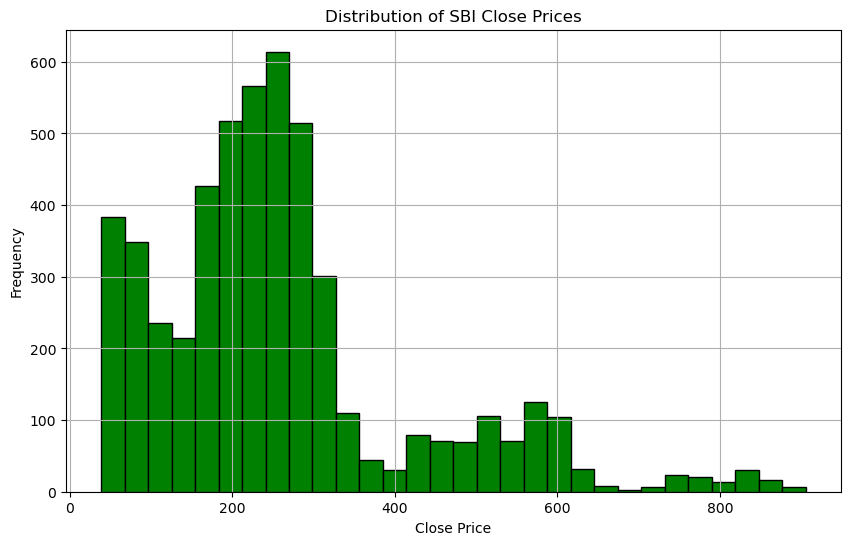

In [17]:
# Histogram for 'Close' prices
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30, color='green', edgecolor='black')
plt.title("Distribution of SBI Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

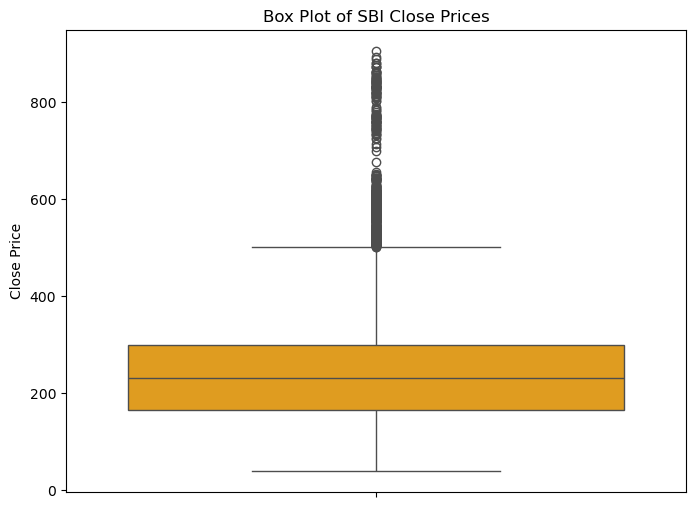

In [18]:
import seaborn as sns

# Box plot for 'Close' prices
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Close'], color='orange')
plt.title("Box Plot of SBI Close Prices")
plt.ylabel("Close Price")
plt.show()

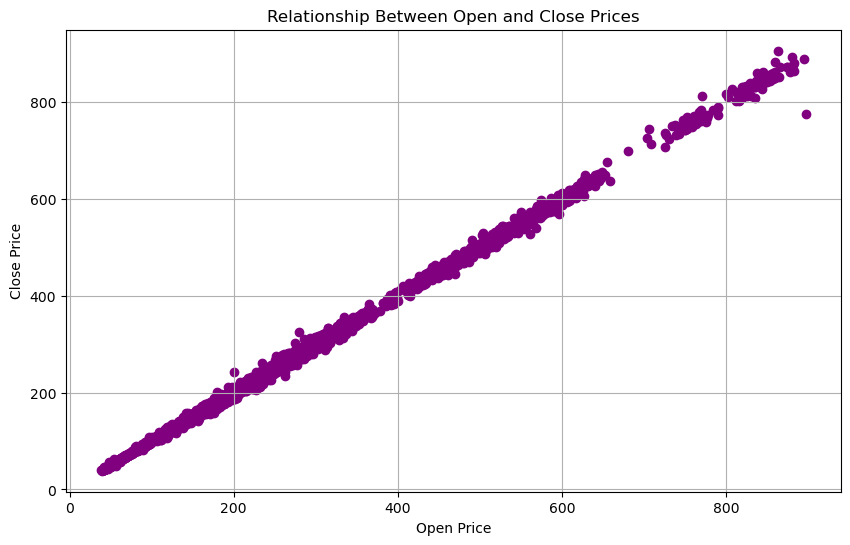

In [19]:
# Scatter plot between 'Open' and 'Close' prices
plt.figure(figsize=(10, 6))
plt.scatter(data['Open'], data['Close'], color='purple')
plt.title("Relationship Between Open and Close Prices")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

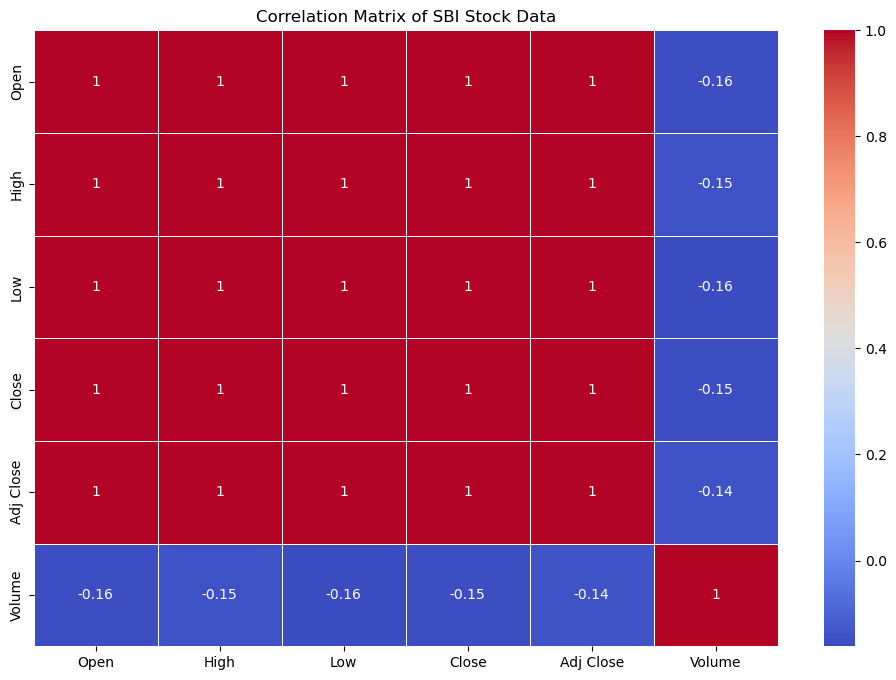

In [20]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of SBI Stock Data")
plt.show()

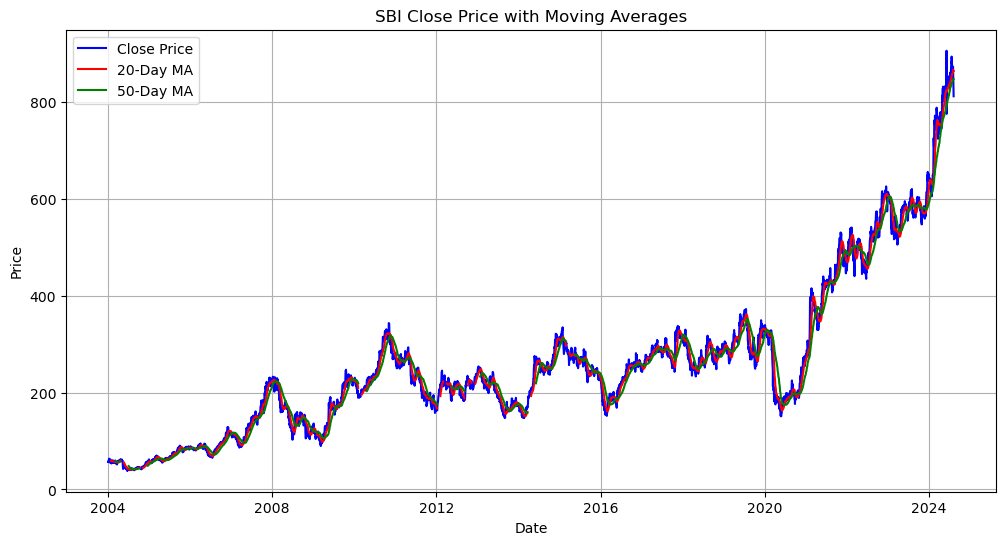

In [21]:
# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Plot the Close Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.plot(data.index, data['MA20'], color='red', label='20-Day MA')
plt.plot(data.index, data['MA50'], color='green', label='50-Day MA')
plt.title("SBI Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\msi00\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


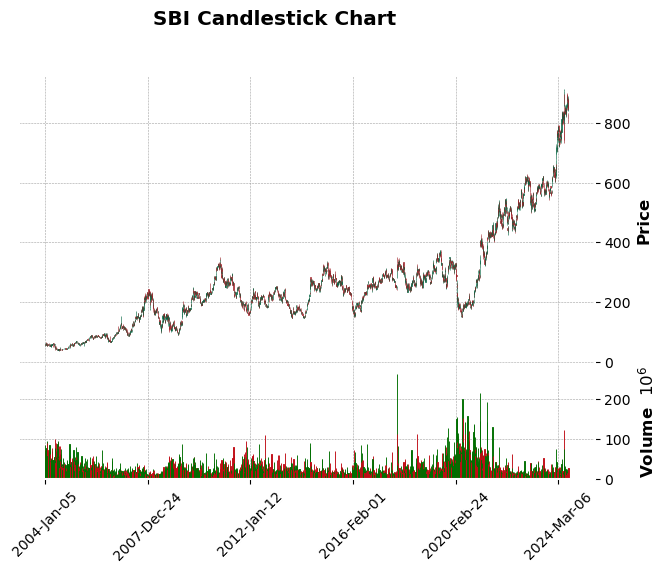

In [22]:
import mplfinance as mpf

# Plot a candlestick chart
mpf.plot(data, type='candle', style='charles', title='SBI Candlestick Chart', ylabel='Price', volume=True)

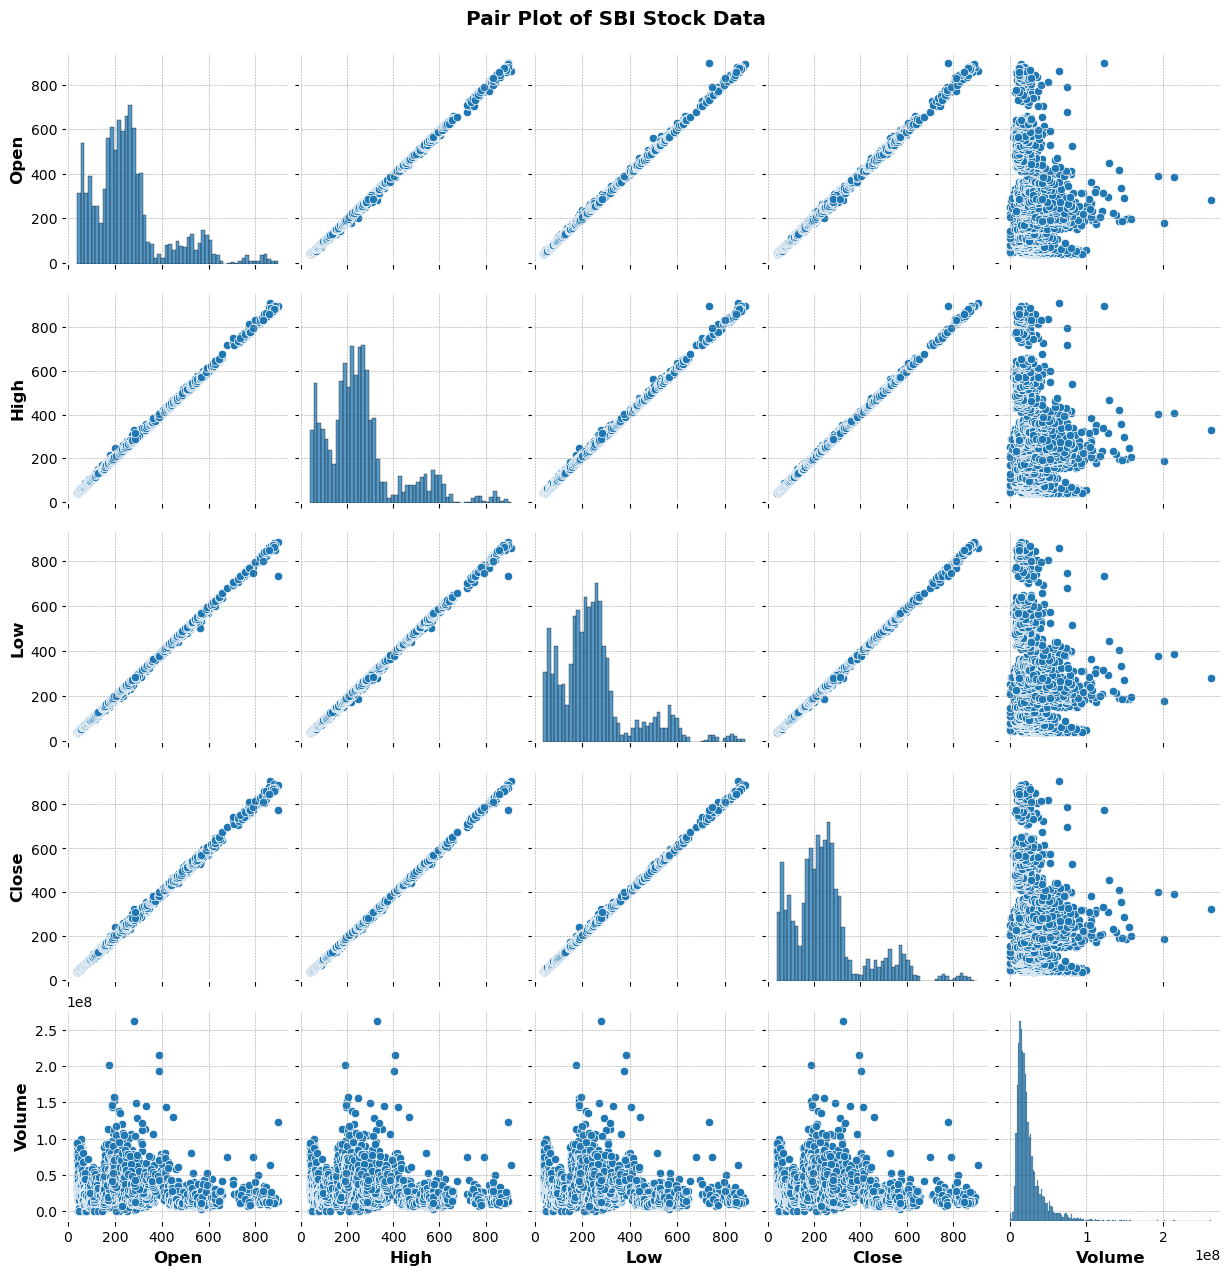

In [23]:
# Pair plot for selected columns
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle("Pair Plot of SBI Stock Data", y=1.02)
plt.show()

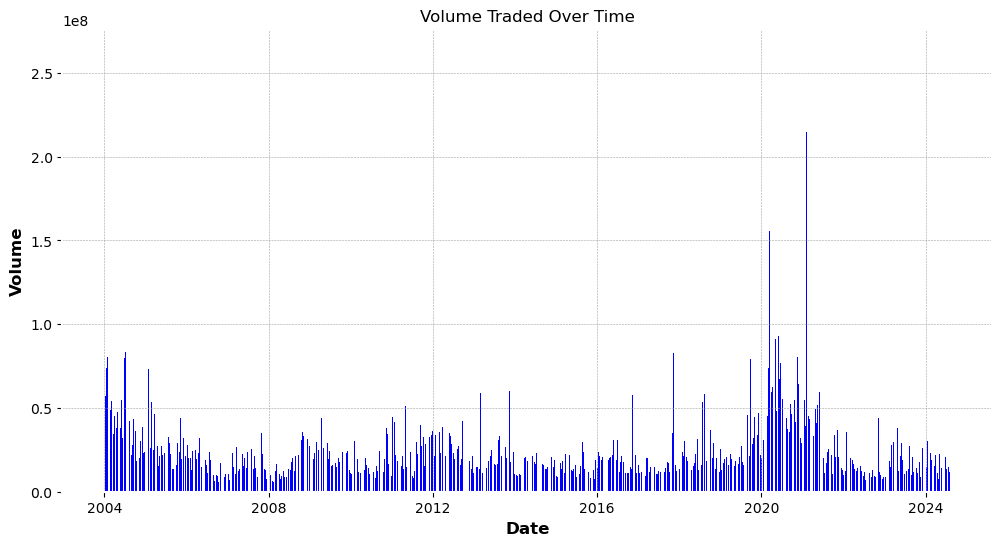

In [24]:
# Bar plot for volume traded over time
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='blue')
plt.title("Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

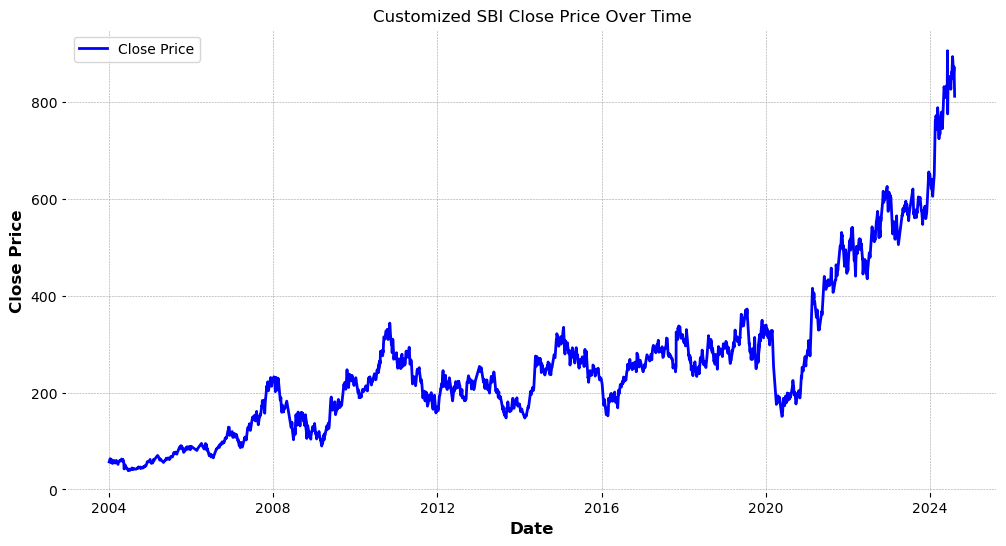

In [25]:
# Example customization with title, labels, and legend
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title("Customized SBI Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [26]:
# Feature Engineering
# Step 1: Creating New Features from Existing Data
# Extract day, month, and year from the Date
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

# Display the new columns
print("Data with Day, Month, and Year columns:")
print(data[['Day', 'Month', 'Year']].head())

Data with Day, Month, and Year columns:
            Day  Month  Year
Date                        
2004-01-05    5      1  2004
2004-01-06    6      1  2004
2004-01-07    7      1  2004
2004-01-08    8      1  2004
2004-01-09    9      1  2004


In [27]:
# Calculate Daily Returns
data['Daily_Return'] = data['Close'].pct_change()

# Display the daily returns
print("Daily Returns:")
print(data[['Close', 'Daily_Return']].head())

Daily Returns:
                Close  Daily_Return
Date                               
2004-01-05  56.700886           NaN
2004-01-06  56.719753      0.000333
2004-01-07  56.290455     -0.007569
2004-01-08  58.569057      0.040479
2004-01-09  60.390053      0.031091


C:\Users\msi00\AppData\Local\Temp\ipykernel_15356\42731154.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Daily_Return'] = data['Close'].pct_change()


In [28]:
# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Display the moving averages
print("Data with 20-day and 50-day Moving Averages:")
print(data[['Close', 'MA20', 'MA50']].head(30))

Data with 20-day and 50-day Moving Averages:
                Close       MA20  MA50
Date                                  
2004-01-05  56.700886        NaN   NaN
2004-01-06  56.719753        NaN   NaN
2004-01-07  56.290455        NaN   NaN
2004-01-08  58.569057        NaN   NaN
2004-01-09  60.390053        NaN   NaN
2004-01-12  60.536297        NaN   NaN
2004-01-13  60.946728        NaN   NaN
2004-01-14  63.447060        NaN   NaN
2004-01-15  62.498821        NaN   NaN
2004-01-16  59.932442        NaN   NaN
2004-01-19  61.956295        NaN   NaN
2004-01-20  59.220085        NaN   NaN
2004-01-21  56.153641        NaN   NaN
2004-01-22  55.228992        NaN   NaN
2004-01-23  58.710583        NaN   NaN
2004-01-26  58.710583        NaN   NaN
2004-01-27  61.201481        NaN   NaN
2004-01-28  59.602211        NaN   NaN
2004-01-29  59.130451        NaN   NaN
2004-01-30  56.427261  59.118657   NaN
2004-02-02  56.427261  59.104976   NaN
2004-02-03  53.525936  58.945285   NaN
2004-02-04  55.6347

In [29]:
# Calculate volatility (rolling standard deviation of daily returns)
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

# Display the volatility
print("Data with Volatility:")
print(data[['Daily_Return', 'Volatility']].head(30))

Data with Volatility:
            Daily_Return  Volatility
Date                                
2004-01-05           NaN         NaN
2004-01-06      0.000333         NaN
2004-01-07     -0.007569         NaN
2004-01-08      0.040479         NaN
2004-01-09      0.031091         NaN
2004-01-12      0.002422         NaN
2004-01-13      0.006780         NaN
2004-01-14      0.041025         NaN
2004-01-15     -0.014945         NaN
2004-01-16     -0.041063         NaN
2004-01-19      0.033769         NaN
2004-01-20     -0.044164         NaN
2004-01-21     -0.051780         NaN
2004-01-22     -0.016466         NaN
2004-01-23      0.063039         NaN
2004-01-26      0.000000         NaN
2004-01-27      0.042427         NaN
2004-01-28     -0.026131         NaN
2004-01-29     -0.007915         NaN
2004-01-30     -0.045716         NaN
2004-02-02      0.000000    0.033212
2004-02-03     -0.051417    0.035166
2004-02-04      0.039397    0.036345
2004-02-05     -0.017468    0.035245
2004-02-06      

In [30]:
# Create lag features
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data['Lag_3'] = data['Close'].shift(3)

# Display the lag features
print("Data with Lag Features:")
print(data[['Close', 'Lag_1', 'Lag_2', 'Lag_3']].head())

Data with Lag Features:
                Close      Lag_1      Lag_2      Lag_3
Date                                                  
2004-01-05  56.700886        NaN        NaN        NaN
2004-01-06  56.719753  56.700886        NaN        NaN
2004-01-07  56.290455  56.719753  56.700886        NaN
2004-01-08  58.569057  56.290455  56.719753  56.700886
2004-01-09  60.390053  58.569057  56.290455  56.719753


In [31]:
# Example of encoding the day of the week (if created)
data['Day_of_Week'] = data.index.dayofweek

# One-hot encoding of the Day_of_Week column
data_encoded = pd.get_dummies(data, columns=['Day_of_Week'], drop_first=True)

# Display the encoded data
print("Data with One-Hot Encoded Day_of_Week:")
print(data_encoded.head())

Data with One-Hot Encoded Day_of_Week:
                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2004-01-05  53.898628  57.016964  53.568394  56.700886  42.897266  68132760.0   
2004-01-06  56.799953  58.436962  55.865868  56.719753  42.911533  84466581.0   
2004-01-07  57.809521  57.809521  55.125206  56.290455  42.586750  71533904.0   
2004-01-08  56.799953  59.347462  56.799953  58.569057  44.310638  44911270.0   
2004-01-09  59.253109  61.423206  58.970051  60.390053  45.688313  73303987.0   

            MA20  MA50  Day  Month  ...  Volatility      Lag_1      Lag_2  \
Date                                ...                                     
2004-01-05   NaN   NaN    5      1  ...         NaN        NaN        NaN   
2004-01-06   NaN   NaN    6      1  ...         NaN  56.700886        NaN   
2004-01-07   NaN   NaN    7      1  ...         NaN  56.719753  56.700886   
2004-01-

In [32]:
# Create interaction features
data['Open_Close_Ratio'] = data['Open'] / data['Close']
data['High_Low_Range'] = data['High'] - data['Low']

# Display the interaction features
print("Data with Interaction Features:")
print(data[['Open', 'Close', 'Open_Close_Ratio', 'High_Low_Range']].head())

Data with Interaction Features:
                 Open      Close  Open_Close_Ratio  High_Low_Range
Date                                                              
2004-01-05  53.898628  56.700886          0.950578        3.448570
2004-01-06  56.799953  56.719753          1.001414        2.571094
2004-01-07  57.809521  56.290455          1.026986        2.684315
2004-01-08  56.799953  58.569057          0.969795        2.547509
2004-01-09  59.253109  60.390053          0.981173        2.453155


In [33]:
# Feature Scaling
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility']])

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=['Close', 'Volume', 'MA20', 'MA50', 'Volatility'])

# Display the scaled data
print("Min-Max Scaled Data:")
print(scaled_data_df.head())


Min-Max Scaled Data:
      Close    Volume  MA20  MA50  Volatility
0  0.020920  0.259378   NaN   NaN         NaN
1  0.020941  0.321561   NaN   NaN         NaN
2  0.020446  0.272326   NaN   NaN         NaN
3  0.023074  0.170975   NaN   NaN         NaN
4  0.025174  0.279065   NaN   NaN         NaN


In [34]:
# Standardization
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility']])

# Convert the standardized data back to a DataFrame
standardized_data_df = pd.DataFrame(standardized_data, columns=['Close', 'Volume', 'MA20', 'MA50', 'Volatility'])

# Display the standardized data
print("Standardized Data:")
print(standardized_data_df.head())

Standardized Data:
      Close    Volume  MA20  MA50  Volatility
0 -1.258683  2.431587   NaN   NaN         NaN
1 -1.258565  3.339117   NaN   NaN         NaN
2 -1.261235  2.620559   NaN   NaN         NaN
3 -1.247064  1.141369   NaN   NaN         NaN
4 -1.235738  2.718907   NaN   NaN         NaN


In [35]:
# Feature Selection
# Correlation-Based Feature Selection
# Check the correlation between features
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Select features with high correlation to the target (e.g., 'Close')
# This step is mostly manual where you choose based on correlation values

Correlation Matrix:
                      Open      High       Low     Close  Adj Close    Volume  \
Open              1.000000  0.999729  0.999625  0.999397   0.998151 -0.155740   
High              0.999729  1.000000  0.999542  0.999726   0.998411 -0.148042   
Low               0.999625  0.999542  1.000000  0.999737   0.998530 -0.161689   
Close             0.999397  0.999726  0.999737  1.000000   0.998726 -0.153705   
Adj Close         0.998151  0.998411  0.998530  0.998726   1.000000 -0.142076   
Volume           -0.155740 -0.148042 -0.161689 -0.153705  -0.142076  1.000000   
MA20              0.996251  0.996056  0.995883  0.995813   0.994919 -0.149523   
MA50              0.989845  0.989672  0.989431  0.989419   0.989147 -0.117327   
Day              -0.006682 -0.006351 -0.006161 -0.006299  -0.006051  0.003124   
Month             0.004224  0.004069  0.005213  0.004925   0.004395 -0.046993   
Year              0.837054  0.837454  0.836689  0.836935   0.845982  0.022686   
Daily_Re

Feature: Open, Importance: 0.011033173252862946
Feature: High, Importance: 0.21708723980784156
Feature: Low, Importance: 0.12451329342191633
Feature: Adj Close, Importance: 0.6113270309211668
Feature: Volume, Importance: 5.918483622965934e-06
Feature: MA20, Importance: 0.002678913151131706
Feature: MA50, Importance: 0.025494153413948405
Feature: Day, Importance: 5.382474681931243e-06
Feature: Month, Importance: 5.042790162237012e-06
Feature: Year, Importance: 1.7324329133024674e-06
Feature: Daily_Return, Importance: 2.763827856354486e-05
Feature: Volatility, Importance: 5.890271845823715e-06
Feature: Lag_1, Importance: 0.004659406769567203
Feature: Lag_2, Importance: 0.0017541839972021348
Feature: Lag_3, Importance: 0.0013390112187435003
Feature: Day_of_Week, Importance: 2.4135480791962858e-06
Feature: Open_Close_Ratio, Importance: 5.272621824576645e-05
Feature: High_Low_Range, Importance: 6.849547504536119e-06


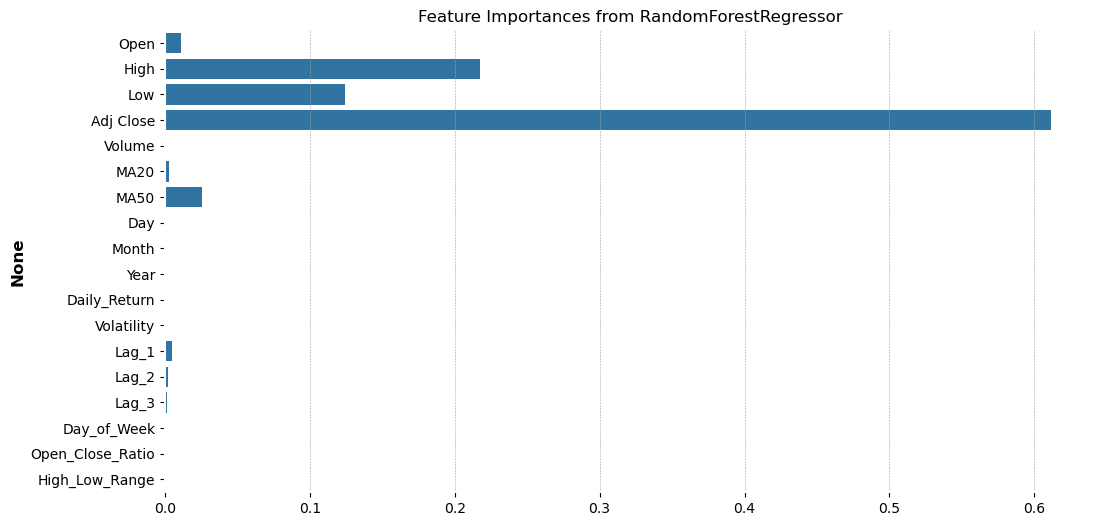

In [36]:
# Feature Importance Using a Model
from sklearn.ensemble import RandomForestRegressor

# Prepare the data (example using Close price prediction)
X = data.drop(columns=['Close'])
y = data['Close']

# Drop rows with NaN values that might have been introduced by shifting or rolling operations
X = X.dropna()
y = y[X.index]

# Train a random forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Display feature importances
for name, importance in zip(feature_names, importances):
    print(f"Feature: {name}, Importance: {importance}")

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances from RandomForestRegressor")
plt.show()

In [62]:
# Model Building and Model Evaluation
# Load the data
data = pd.read_csv("C:\\Users\\msi00\\OneDrive\\Desktop\\SBI.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Drop any rows with NaN values (if applicable)
data = data.dropna()

# Define features and target variable
X = data.drop(columns=['Close'])  # Predicting 'Close' prices
y = data['Close']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4072, 5)
Testing set shape: (1019, 5)


In [63]:
# Linear Regression
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R-squared:", r2_lr)

Linear Regression MSE: 4.936746084161617
Linear Regression R-squared: 0.9998167129841681


In [64]:
# Decision Tree Regression
# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression MSE:", mse_dt)
print("Decision Tree Regression R-squared:", r2_dt)

Decision Tree Regression MSE: 7.3630718830680175
Decision Tree Regression R-squared: 0.9997266305680308


In [65]:
# Random Forest Regression
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R-squared:", r2_rf)

Random Forest Regression MSE: 5.340893537759825
Random Forest Regression R-squared: 0.999801708165313


In [66]:
# Support Vector Regression (SVR)
# Initialize and train the SVR model with an RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)  # Use scaled data

# Make predictions and evaluate the model
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression MSE:", mse_svr)
print("Support Vector Regression R-squared:", r2_svr)

Support Vector Regression MSE: 4207.522669319341
Support Vector Regression R-squared: 0.8437869274705242


In [67]:
# Gradient Boosting Regression
# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression MSE:", mse_gb)
print("Gradient Boosting Regression R-squared:", r2_gb)

Gradient Boosting Regression MSE: 9.666149615717982
Gradient Boosting Regression R-squared: 0.9996411239939332


In [68]:
#  Model Evaluation and Comparison
# Summary of model performance
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regression', 'Gradient Boosting']
mse_values = [mse_lr, mse_dt, mse_rf, mse_svr, mse_gb]
r2_values = [r2_lr, r2_dt, r2_rf, r2_svr, r2_gb]

# Display the performance comparison
print("\nModel Performance Comparison:")
for i, model in enumerate(models):
    print(f"{model} - MSE: {mse_values[i]}, R-squared: {r2_values[i]}")


Model Performance Comparison:
Linear Regression - MSE: 4.936746084161617, R-squared: 0.9998167129841681
Decision Tree - MSE: 7.3630718830680175, R-squared: 0.9997266305680308
Random Forest - MSE: 5.340893537759825, R-squared: 0.999801708165313
Support Vector Regression - MSE: 4207.522669319341, R-squared: 0.8437869274705242
Gradient Boosting - MSE: 9.666149615717982, R-squared: 0.9996411239939332


In [69]:
# Cross-Validation
# Perform cross-validation on the Random Forest model as an example
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Output the cross-validation scores
print("Random Forest Cross-Validation R-squared Scores:", cv_scores)
print("Average Cross-Validation R-squared:", cv_scores.mean())

Random Forest Cross-Validation R-squared Scores: [0.9996306  0.99979186 0.99980344 0.99985995 0.99980555]
Average Cross-Validation R-squared: 0.9997782798857692


In [70]:
#  Hyperparameter Tuning (Optional)
from sklearn.model_selection import GridSearchCV

# Example: GridSearch for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9997807045255793


In [71]:
from prophet import Prophet

In [72]:
# Load the data
data = pd.read_csv("C:\\Users\\msi00\\OneDrive\\Desktop\\SBI.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Prophet requires the data to have two specific columns: 'ds' for the date and 'y' for the target variable
df = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Display the first few rows to ensure the data is correctly formatted
df.head()

,ds,y
0,2004-01-05,56.700886
1,2004-01-06,56.719753
2,2004-01-07,56.290455
3,2004-01-08,58.569057
4,2004-01-09,60.390053


In [73]:
# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

11:36:37 - cmdstanpy - INFO - Chain [1] start processing
11:36:38 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
# Create a DataFrame to hold future dates (e.g., next 365 days)
future = model.make_future_dataframe(periods=365)

# Display the future DataFrame
future.tail()

,ds
5451,2025-08-01
5452,2025-08-02
5453,2025-08-03
5454,2025-08-04
5455,2025-08-05


In [75]:
# Make predictions
forecast = model.predict(future)

# Display the forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5451,2025-08-01,905.369128,841.030320,968.091120
5452,2025-08-02,839.671378,768.872301,899.242818
5453,2025-08-03,887.704226,820.978599,953.095693
5454,2025-08-04,905.552441,837.353164,966.572274
5455,2025-08-05,905.549801,837.970529,962.239550


C:\Users\msi00\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\msi00\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


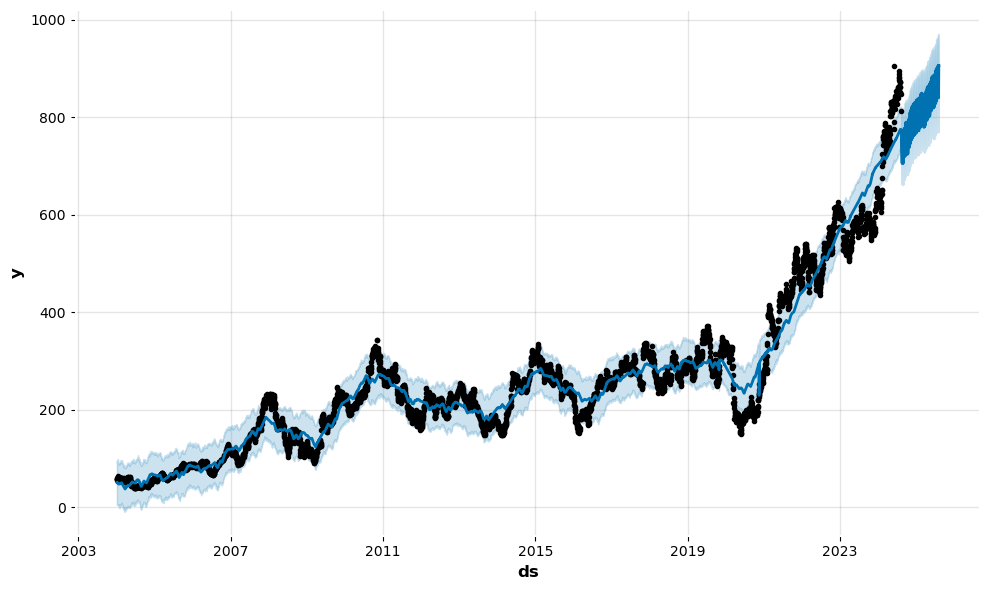

In [76]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

C:\Users\msi00\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\msi00\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\msi00\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

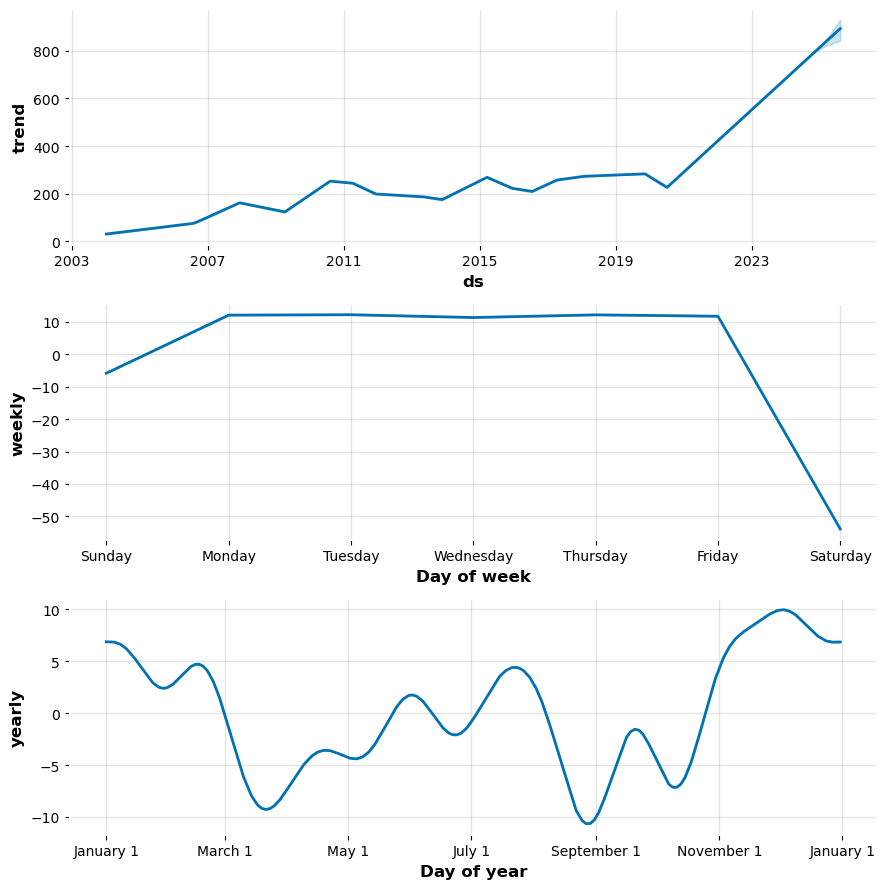

In [77]:
# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

In [78]:
# Assuming df contains the original data and forecast contains the Prophet forecast
merged_df = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='left')

In [79]:
# Check for NaN values in the merged dataframe
print(merged_df.isna().sum())

# Display rows with NaN values
print(merged_df[merged_df.isna().any(axis=1)])

ds      0
y       9
yhat    9
dtype: int64
             ds   y  yhat
80   2004-04-26 NaN   NaN
202  2004-10-13 NaN   NaN
1518 2010-02-06 NaN   NaN
1996 2012-01-07 NaN   NaN
2035 2012-03-03 NaN   NaN
2165 2012-09-08 NaN   NaN
2207 2012-11-11 NaN   NaN
2544 2014-03-22 NaN   NaN
2773 2015-02-28 NaN   NaN


In [80]:
# Remove rows with NaN values
merged_df = merged_df.dropna()

In [81]:
from sklearn.metrics import mean_squared_error

# Calculate MSE between actual and predicted values
mse_prophet = mean_squared_error(merged_df['y'], merged_df['yhat'])
print(f"Prophet Model Mean Squared Error: {mse_prophet}")

Prophet Model Mean Squared Error: 1172.3120227541524
